In [1]:
#import dependencies and set-up
import pandas as pd
import matplotlib.pyplot as plt
import csv
import os
from scipy.stats import linregress
import scipy.stats as st
import gmaps
import gmaps.datasets


In [2]:
corrected_data_path = "Resources2/dummy_data.csv"

corrected_data_df = pd.read_csv(corrected_data_path)
corrected_data_df

,date,state,infected,landed flights,month
0,3/24/2020,GU,32,3,December
1,3/24/2020,AK,36,14,February
2,3/24/2020,DC,137,21,June
3,3/24/2020,DE,91,23,August
4,3/24/2020,AR,218,44,September
...,...,...,...,...,...
10820,10/20/2020,CA,874077,3286,December
10821,10/20/2020,FL,760389,3662,February
10822,10/20/2020,IL,354462,3714,October
10823,10/20/2020,WI,187828,4686,October


Text(0, 0.5, 'Counts')

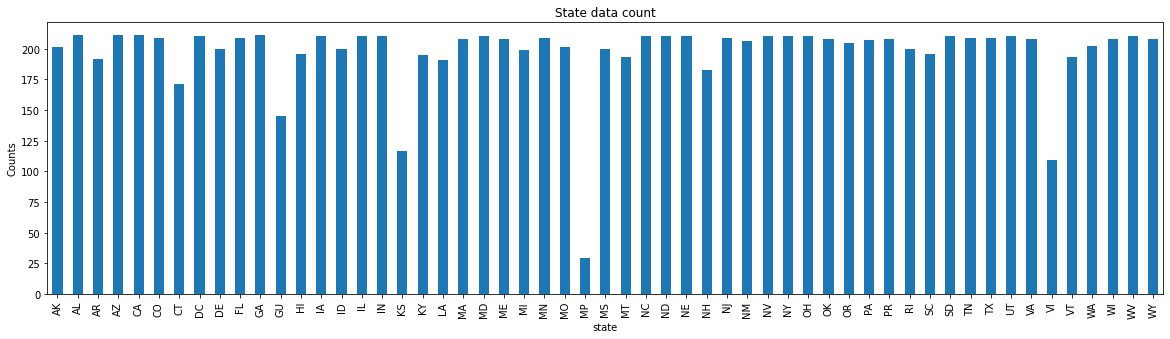

In [34]:
#total number of datapoint per state (to check the number of data points are fairly simimral )
state_gb = corrected_data_df.groupby(["state"])
count_st = state_gb.count()["infected"]
count_chart= count_st.plot(kind= "bar", figsize=(20,5))
plt.title("State datapoint count")
count_chart.set_ylabel("Counts")


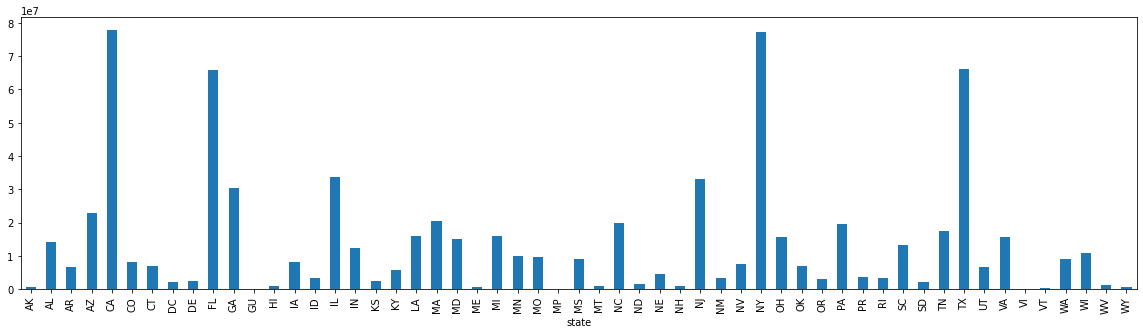

In [33]:
#total number of infected people per state in a year
state_gb = corrected_data_df.groupby(["state"])
state_count = state_gb.sum()["infected"]
state_count.head(12)
count_chart = state_count.plot(kind = "bar", figsize= (20,5))
plt.show()

In [10]:
print(state_gb)


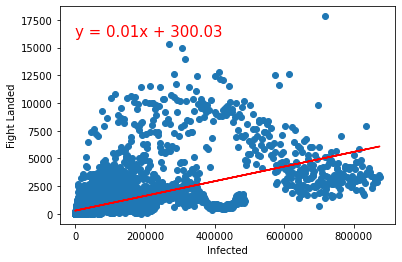

In [15]:
infected_values = corrected_data_df["infected"]
flights_values = corrected_data_df["landed flights"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(infected_values, flights_values)
regress_values = infected_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(infected_values,flights_values)


plt.plot(infected_values,regress_values,"r-")
plt.annotate(line_eq,(20,16000),fontsize=15,color="red")
plt.xlabel('Infected')
plt.ylabel('Fight Landed')
plt.show()

In [14]:
correlation = st.pearsonr(corrected_data_df["infected"], corrected_data_df["landed flights"])
print(correlation)

(0.6021039208630193, 0.0)
